<a href="https://colab.research.google.com/github/SAHARIARSHOWMIK/CNN-Image-Classification/blob/main/ImageClassification.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:

import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
import matplotlib.pyplot as plt
from tensorflow.keras.layers import Conv2D, MaxPool2D, Dense, Flatten, Dropout, Input
from tensorflow.keras.models import Sequential

In [2]:
tf.__version__

'2.18.0'

In [3]:
from keras.datasets import cifar10
(X_train, y_train), (X_test, y_test) = cifar10.load_data()

170498071/170498071 ━━━━━━━━━━━━━━━━━━━━ 4s 0us/step


In [4]:
print("X Train: {} \nX Test: {} \ny Train: {} \ny test: {}".format(X_train.shape, X_test.shape, y_train.shape, y_test.shape))


X Train: (50000, 32, 32, 3) 
X Test: (10000, 32, 32, 3) 
y Train: (50000, 1) 
y test: (10000, 1)


In [5]:
y_train = tf.keras.utils.to_categorical(y_train, num_classes=10)
y_test = tf.keras.utils.to_categorical(y_test, num_classes=10)

In [6]:
train_datagen = ImageDataGenerator(
    rescale = 1./255,
    shear_range = 0.2,
    zoom_range = 0.2,
    horizontal_flip = True
)

In [7]:
train_generator = train_datagen.flow(
    X_train, y_train,
    batch_size = 32
)

In [8]:
test_datagen = ImageDataGenerator(
    rescale = 1./255
)

In [9]:
test_generator = test_datagen.flow(
    X_test, y_test,
    batch_size = 32
)

In [10]:
cnn = Sequential()

In [11]:
cnn.add(Input(shape=(32, 32, 3)))

In [12]:
cnn.add(Conv2D(filters=32, kernel_size=(3,3), strides=(1,1), activation="relu"))


In [13]:
cnn.add(MaxPool2D(pool_size=(2,2), strides=2))


In [14]:
cnn.add(Conv2D(filters=64, kernel_size=(3,3), strides=(1,1), activation="relu"))


In [15]:
cnn.add(MaxPool2D(pool_size=(2,2), strides=2))


In [16]:
cnn.add(Flatten())


In [17]:
cnn.add(Dense(units=128, activation="relu"))


In [18]:
cnn.add(Dense(units=64, activation="relu"))


In [19]:
cnn.add(Dense(units=10, activation="softmax"))


In [20]:
cnn.compile(optimizer="adam", loss="categorical_crossentropy", metrics=["accuracy", "precision", "recall", "f1_score"])


In [21]:
history = cnn.fit(
    train_generator,
    epochs=25,
    validation_data=test_generator
)

Epoch 1/25


/usr/local/lib/python3.11/dist-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


1563/1563 ━━━━━━━━━━━━━━━━━━━━ 105s 65ms/step - accuracy: 0.3683 - f1_score: 0.3552 - loss: 1.7310 - precision: 0.6107 - recall: 0.1278 - val_accuracy: 0.5583 - val_f1_score: 0.5456 - val_loss: 1.2223 - val_precision: 0.7117 - val_recall: 0.3812
Epoch 2/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 102s 65ms/step - accuracy: 0.5747 - f1_score: 0.5716 - loss: 1.2037 - precision: 0.7339 - recall: 0.4041 - val_accuracy: 0.6115 - val_f1_score: 0.6019 - val_loss: 1.1219 - val_precision: 0.7206 - val_recall: 0.4911
Epoch 3/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 103s 66ms/step - accuracy: 0.6282 - f1_score: 0.6265 - loss: 1.0584 - precision: 0.7648 - recall: 0.4891 - val_accuracy: 0.6599 - val_f1_score: 0.6572 - val_loss: 0.9716 - val_precision: 0.7826 - val_recall: 0.5359
Epoch 4/25
1563/1563 ━━━━━━━━━━━━━━━━━━━━ 99s 63ms/step - accuracy: 0.6588 - f1_score: 0.6580 - loss: 0.9760 - precision: 0.7774 - recall: 0.5365 - val_accuracy: 0.6581 - val_f1_score: 0.6495 - val_loss: 0.9812 - val_precision: 0.7627 - val

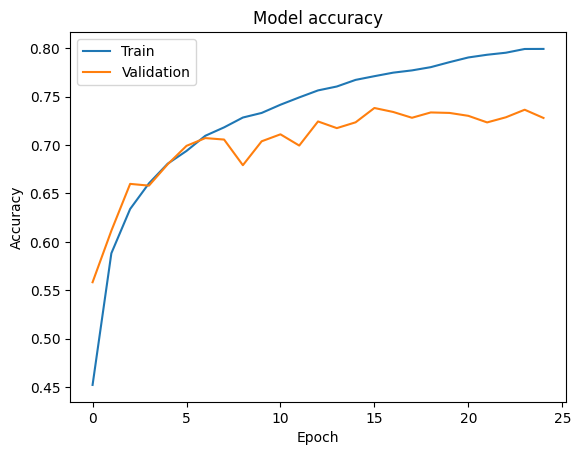

In [22]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('Model accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.show()